# Milestone 1 - Data Visualization Complementary Views 

## Author - Logan Downing
### Datasci 410
Apr 19, 2018



## Instructions
1. Create different complementary views of data by applying multiple chart types and aesthetics.
2. Project multiple dimensions using conditioning or faceting (e.g. small multiples) on both categorical and numeric variables.

In [1]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# some utility arrays
dow=['Sun','Mon','Tue','Wed','Thu','Fri','Sat']
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
hours =['12am','1am','2am','3am','4am','5am','6am','7am','8am','9am','10am','11am','12pm','1pm','2pm','3pm','4pm','5pm','6pm','7pm','8pm','9pm','10pm','11pm']

In [2]:
# Load data
#filename = 'https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/JitteredHeadCount.csv'
filename='JitteredHeadCount.csv'
df = pd.read_csv(filename,parse_dates=['DateFormat'],infer_datetime_format=True)

# drop uninteresting DayNumber column
df.drop('DayNumber',axis=1,inplace=True)

# rename 'DateFormat' column to 'Date'
df.columns = [x if x!='DateFormat' else 'Date' for x in df.columns.values]

df.describe()

Hour      TablesOcc     TablesOpen   TablesClosed  \
count  175677.000000  175677.000000  175677.000000  175677.000000   
mean       11.504431       2.074591       2.555804       1.853430   
std         6.922330       3.307518       3.673229       2.993767   
min         0.000000       0.000000       0.000000       0.000000   
25%         6.000000       0.000000       1.000000       0.000000   
50%        12.000000       1.000000       1.000000       1.000000   
75%        18.000000       2.000000       3.000000       3.000000   
max        23.000000      24.000000      24.000000      23.000000   

           HeadCount      DayOfWeek  
count  175677.000000  175677.000000  
mean        7.390228       3.992953  
std        12.458613       1.997989  
min         0.000000       1.000000  
25%         0.000000       2.000000  
50%         3.000000       4.000000  
75%         8.000000       6.000000  
max       109.000000       7.000000

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175677 entries, 0 to 175676
Data columns (total 8 columns):
GameCode        175677 non-null object
Date            175677 non-null datetime64[ns]
Hour            175677 non-null int64
TablesOcc       175677 non-null int64
TablesOpen      175677 non-null int64
TablesClosed    175677 non-null int64
HeadCount       175677 non-null int64
DayOfWeek       175677 non-null int64
dtypes: datetime64[ns](1), int64(6), object(1)
memory usage: 10.7+ MB


In [5]:
df.head()

GameCode       Date  Hour  TablesOcc  TablesOpen  TablesClosed  HeadCount  \
0       BA 2011-09-16     6          0           0             1          0   
1       BA 2011-09-16     7          0           0             1          0   
2       BA 2011-09-16     8          0           0             1          0   
3       BA 2011-09-16     9          0           0             1          0   
4       BA 2011-09-16    10          0           1             0          0   

   DayOfWeek  
0          6  
1          6  
2          6  
3          6  
4          6

# 1. Data preparation
Let's take a quick look at the provided information to get an overview of our data. We'll also see that we have a complete set without anomalies. 

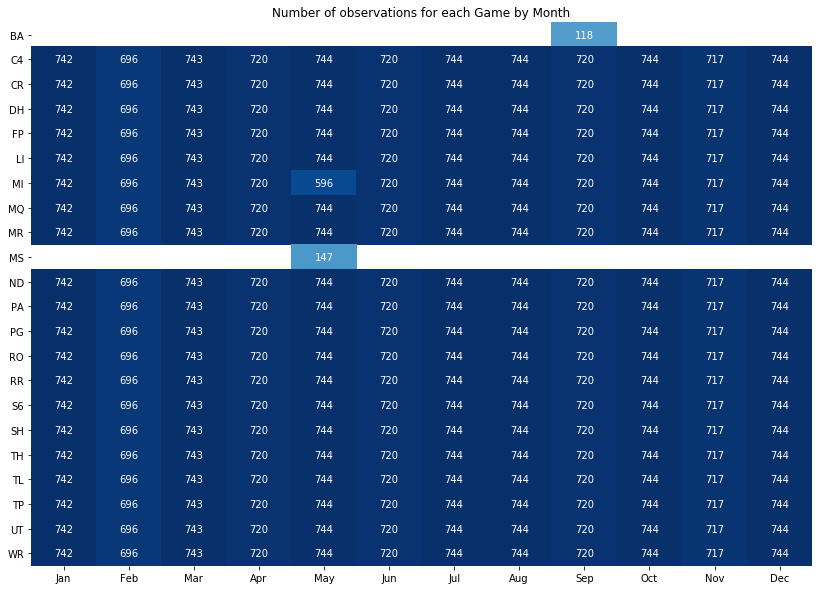

In [6]:
# Check records to see if we measure all games equally over the year
import datetime

# Create a column of just the month
df['Month'] = df['Date'].map(lambda x: x.month)

# Create a column for counting
df['Counts']=1

# Pivot out by month & gamecode using values Counts
ax= plt.figure(figsize=(14,10)).gca()
sns.heatmap(
    data=pd.pivot_table(data=df,index='GameCode',columns='Month',values='Counts',
                        aggfunc='sum'),
    cbar=False,
    cbar_kws={"orientation": "vertical"},
    cmap='Blues',
    center=2.5, 
    annot=True,
    fmt=".0f"
)
ax.set_title("Number of observations for each Game by Month")
ax.set_ylabel("")
ax.set_xlabel("")
ax.set_yticklabels(ax.yaxis.get_majorticklabels(), fontdict={'rotation':0})
_=ax.set_xticklabels(months,fontdict={'rotation':0})

In [7]:
# Drop games BA and MS because they appear to be experimental and 
# did not continue throughout the year
df.loc[(df['GameCode']=='BA')|(df['GameCode']=='MS'),'Counts']=np.nan
df.dropna(inplace=True)                                               

### 1.1 Finding: Two experimental games
We see from the above chart that two games, Baccarat (BA) and Mississippi Stud (MS), were on the floor for less than one month each.
We'll omit them from our analysis.

# 2. Demographics
## Analyze the collected data to examine customer "traffic patterns"
Here we examine on-the-floor traffic by customers to see if there are any patterns. We look at time of day and day of week, to see if there is anything interesting. You can use these findings to help inform your staffing decisions.

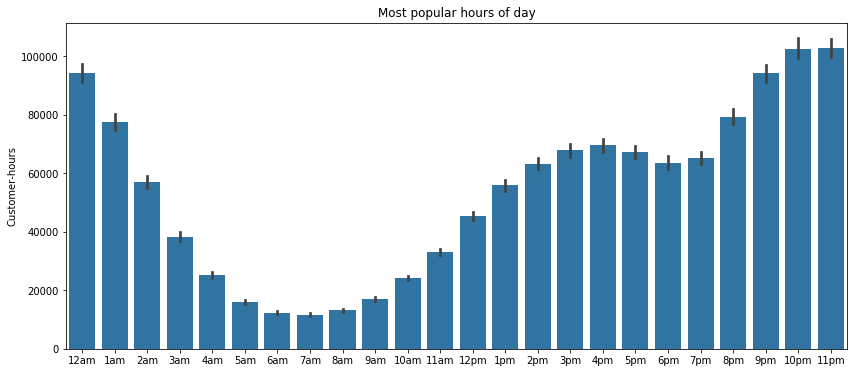

In [8]:
# Customer traffic: find the most popular hours of day
#df.groupby('Hour').sum()['HeadCount'].plot(kind='bar')
ax= plt.figure(figsize=(14,6)).gca()
sns.barplot(data=df,x='Hour',y='HeadCount',estimator=np.sum,color='C0')
ax.set_title("Most popular hours of day")
ax.set_ylabel("Customer-hours")
ax.set_xlabel("")
_=ax.set_xticklabels(hours)

### 2.1 Finding: Most popular hours per day
From the graph above, you can see the casino has most customers during two timeframes:
* 3-6pm dinner rush 
* 9pm-midnight evening play

The evening play sees the most customers.

The timeframe with the least customers is the early morning:
* 5-9am early birds


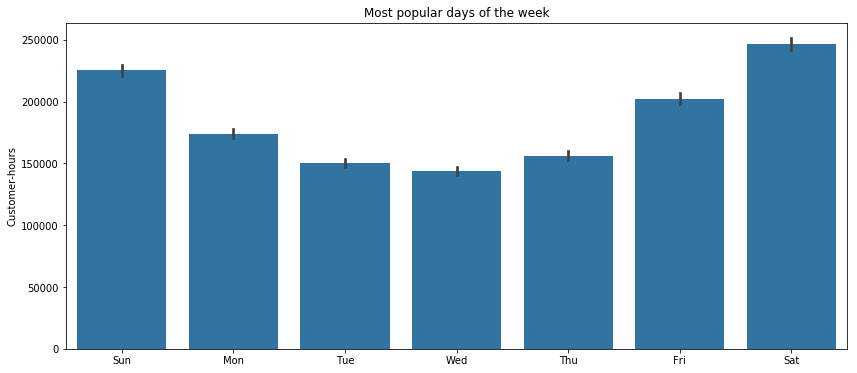

In [9]:
# Customer traffic: find the most popular days of week (e.g., Sun through Sat)
ax= plt.figure(figsize=(14,6)).gca()
sns.barplot(data=df,x='DayOfWeek',y='HeadCount',estimator=np.sum,color='C0')
ax.set_title("Most popular days of the week")
ax.set_ylabel("Customer-hours")
ax.set_xlabel("")
_=ax.set_xticklabels(dow)

### 2.2 Finding: Most popular days of the week
From the graph above, you can see the casino has most customers on the following days:
* Friday
* Saturday
* Sunday

Saturday is the day with the most overall customer traffic.

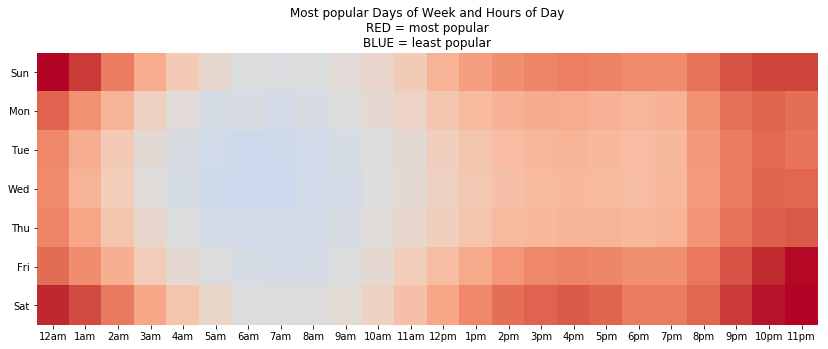

In [10]:
# create a single plot merging both hours of day and days of week
ax= plt.figure(figsize=(14,5)).gca()
sns.heatmap(
    data=pd.pivot_table(data=df,index='DayOfWeek',columns='Hour',values='HeadCount',aggfunc='mean'),
    cbar=False,
    cbar_kws={"orientation": "vertical"},
    cmap='coolwarm',
    center=2.5, annot=False
)
ax.set_title("Most popular Days of Week and Hours of Day\nRED = most popular\nBLUE = least popular")
ax.set_ylabel("")
ax.set_xlabel("")

ax.set_yticklabels(dow,fontdict={'rotation':0})
_=ax.set_xticklabels(hours,fontdict={'rotation':0})

### 2.3 Bonus: "Traffic map"
The figure above shows hours of day, and days of week, in a single graph. From this graph you can pick out the combination of hours & days that have the most traffic (deep red) or least traffic (dark blue). 

# 3. Game popularity
Let's look at how well the games perform in terms of popularity, the number of customers playing them at any given time. We'll also see if we can group games that perform similarly with each other as measured by numbers of open tables and customers.

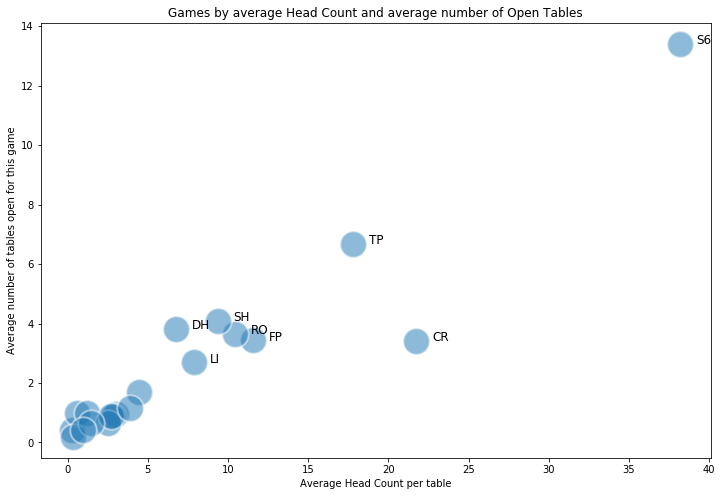

In [11]:
# for each game type, find the average headcount and average number of open tables
df2=df.groupby('GameCode').mean()
ax=plt.figure(figsize=(12,8)).gca()
df2.plot(kind='scatter',x='HeadCount',y='TablesOpen',
                                   s=700,alpha=.5,
                                   linewidths=2,
                                   edgecolor='white',
                                   ax=ax)
# annotate:
# https://python-graph-gallery.com/46-add-text-annotation-on-scatterplot/
for line in range(0,df2.shape[0]):
     ax.text(df2['HeadCount'][line]+1, df2['TablesOpen'][line], 
             df2.index[line] if df2['HeadCount'][line]>5 else "", 
             horizontalalignment='left', 
             size='large', color='black', weight='normal')
ax.set_title("Games by average Head Count and average number of Open Tables")
ax.set_xlabel("Average Head Count per table")
_=ax.set_ylabel("Average number of tables open for this game")

### 3.1 Finding: Most popular games and game groupings
The graph above shows each game's average attendance per table, and how many tables of that game are open at a particular time. Games can be grouped into four categories:
* **Cash Cow:** Wheel of Fortune (Big Six-S6) stands head-and-shoulders above all other games for the number of customers enjoying this game, and the number of open tables.
* **High Flier:** 2 games (Texas Hold'em-TP and Craps-CR) consistently have a high head count per table, and above average numbers of tables open at any given time.
* **Solid Middle:** 5 games (Let It Ride-LI, Blackjack variants-DH/SH, Roulette-RO, and Four Card Poker-FP) lie solidly in the middle, with about a dozen customers per table. You have about four of these tables for a given game open at any time.
* **Small But Mighty:** The rest of the games have lower volumes of patrons, generally less than 5 customers per table. You open fewer than 2 tables at a time for these games.

In [12]:
# add a column for game category, as derived in the "popularity" graphic above. 
# There are four distinct groups of games. we'll use this facet in upcoming graphs.
game_types = { 'Cash Cow':['S6'],
                'High Flier':['TP','CR'],
                'Solid Middle':['DH','SH','RO','FP'],
                'Small But Mighty':['C4','BA','LI','MI','MQ','MR','MS','ND','PA','PG','RR','TH','TL','UT','WR']
              }
game_types_lookup = {}
for i,j in game_types.items():
    for k in j:
        game_types_lookup[k]=i

# assign 1 of the 4 categories to each game
df['GameCategory'] = df['GameCode'].apply(lambda x:game_types_lookup[x])
#df2['GameCategory'] = df2['GameCode'].apply(lambda x:game_types_lookup[x])
df.head()

GameCode       Date  Hour  TablesOcc  TablesOpen  TablesClosed  HeadCount  \
118       C4 2012-04-01     0          1           1             0          5   
119       C4 2012-04-01     1          1           1             0          5   
120       C4 2012-04-01     2          1           1             0          5   
121       C4 2012-04-01     3          1           1             0          5   
122       C4 2012-04-01     4          1           1             0          1   

     DayOfWeek  Month  Counts      GameCategory  
118          1      4     1.0  Small But Mighty  
119          1      4     1.0  Small But Mighty  
120          1      4     1.0  Small But Mighty  
121          1      4     1.0  Small But Mighty  
122          1      4     1.0  Small But Mighty

# 4. Table performance
Each game has a certain number of tables open per hour, but might not always have customers at every table. We'll take a look at the "table performance" to determine patterns in how well used are each game's open tables. Use this section to evaluate the performance of your pit boss to manage the open tables.

In [13]:
# create a metric, TableEfficiency, which is the ratio of TablesOccupied to TablesOpen.
# values of 1 indicate all tables for that game (for that day & hour) are being used.
df['TableEfficiency'] = df.TablesOcc/df.TablesOpen * 100

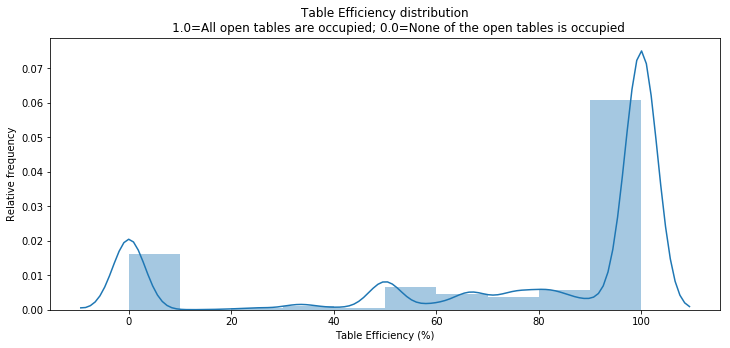

In [14]:
# now explore to see any patterns
ax=plt.figure(figsize=(12,5)).gca()
sns.distplot(df.TableEfficiency.dropna(),bins=10,kde=True,hist=True,ax=ax)
ax.set_title("Table Efficiency distribution\n\
       1.0=All open tables are occupied; 0.0=None of the open tables is occupied")
ax.set_xlabel("Table Efficiency (%)")
ax.set_ylabel("Relative frequency")
_=""

### 4.1 Finding: Most open tables are occupied
Good news is that the pit boss is doing a great job keeping tables occupied. The majority of games have table efficiencies of more than 90%. That means that relatively few open tables are being left vacant. We'll examine table efficiency for the various games next, to give you a feeling for which are performing best.

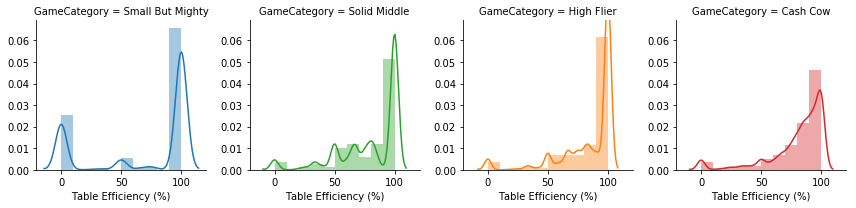

In [15]:
# graph by facet on game category (the four kinds of games we discovered in an earlier section)
g = sns.FacetGrid(df,col='GameCategory',hue='GameCategory',col_order=['Small But Mighty','Solid Middle','High Flier','Cash Cow'])
g.map(sns.distplot,'TableEfficiency',bins=10)
g.set_axis_labels("Table Efficiency (%)")
_=""

### 4.2 Finding: Tables are occupied well across all game categories
The graphs above show the table efficiencies for the four categories of games we identified earlier. You can see the table efficiency for all types is concentrated in the 80-100% area. This means that the pit boss is doing a great job keeping open game tables occupied across the board.

# 5. Trends
We conclude with a look at the performance of the casino over the year (Aug 2011-July 2012). This will give you a high-level overview of how well your business is performing, and how to plan for future initiatives.

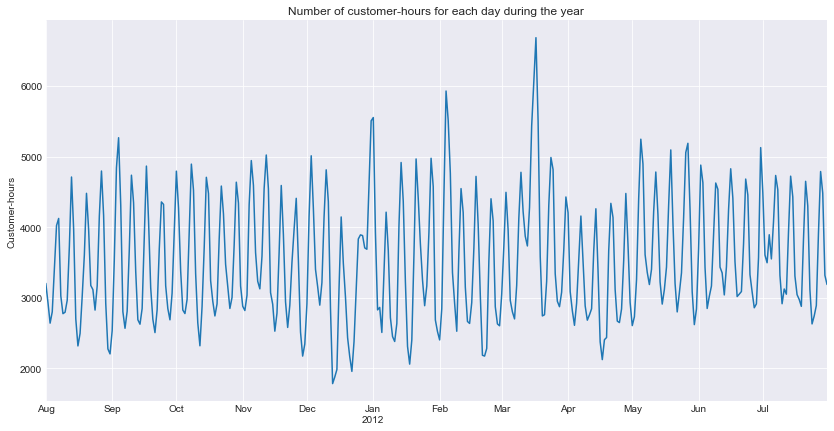

In [16]:
# get a daily plot of customer-hours over the year (365 days)
sns.set_style("darkgrid")
ax=plt.figure(figsize=(14,7)).gca()
df.groupby("Date")['HeadCount'].sum().plot(ax=ax)
ax.set_title("Number of customer-hours for each day during the year")
ax.set_xlabel("")
ax.set_ylabel("Customer-hours")
_=""

### 5.1 Finding: Daily ranges
Overall the casino sees a pretty steady pattern of customers throughout the year. The daily attendance ranges from about 2,800 customer-hours on fallow days to 4,800 customer-hours on peak days.

In [17]:
# find the highest and lowest days of the year
df3=pd.DataFrame(df.groupby("Date")['HeadCount'].sum().sort_values(ascending=False))

# highest
print("The days with the highest attendance are:")
print( df3.head(10) )
print()

# lowest
print("The days with the lowest attendance are:")
print( df3.tail(10) )

The days with the highest attendance are:
            HeadCount
Date                 
2012-03-17       6686
2012-03-16       6067
2012-02-04       5930
2012-01-01       5554
2012-02-05       5512
2012-03-18       5510
2011-12-31       5508
2012-03-15       5435
2011-09-04       5268
2012-05-05       5247

The days with the lowest attendance are:
            HeadCount
Date                 
2012-02-21       2185
2012-02-22       2173
2011-11-29       2173
2011-12-21       2164
2012-04-17       2123
2012-01-18       2059
2011-12-15       1983
2011-12-22       1956
2011-12-14       1876
2011-12-13       1783


### 5.2 Finding: Best- and least-performing days
By looking at the customer-hours for each day of the year, we can get a list of which days performed best and worst.

**Best performing days**  
In 2012 the best performing days were over St. Patricks weekend. During 3/15 to 3/18 the casino had an average of 5,900 customer-hours each day. Other top periods include:

* 2/4-2/5
* 12/31 - New Years Eve
* 9/4/2011 - Labor Day Weekend
* 5/5 - Cinco de Mayo

**Least performing days**  
Most 2012 periods with the least attendance tend to fall during Christmas (5 least-performing days), with an average of fewer than 2,000 customer-hours. Other low periods include:

* 2/21-2/22 - Days after President's Day Weekend
* 11/29/2011 - Tuesday after Thanksgiving
* 4/17 - Tax Day
* 1/18 - Tuesday after MLK Day


In [18]:
# finally, take a look at weekly trends, to help forecast performance

# resample original data by week (vs. day)
df5=df.groupby('Date').sum().resample('W').sum()

# move the index (Date) into a column for processing
df6=df5.truncate(after='7/31/2012').reset_index()

# create a new column that is the integer Timestamp of the index
import time
df6['Timestamp']=df6['Date'].apply(lambda x: time.mktime(x.timetuple()))
df6.head()

Date   Hour  TablesOcc  TablesOpen  TablesClosed  HeadCount  \
0 2011-08-07  38640       6682        8106          6678      23141   
1 2011-08-14  38640       6755        8158          6626      23968   
2 2011-08-21  38640       6498        8070          6714      22585   
3 2011-08-28  38640       6954        8330          6454      25401   
4 2011-09-04  38640       6601        8293          6491      23583   

   DayOfWeek  Month  Counts  TableEfficiency     Timestamp  
0      13440  26880  3360.0    209354.890144  1.312700e+09  
1      13440  26880  3360.0    201985.496781  1.313305e+09  
2      13440  26880  3360.0    202920.021266  1.313910e+09  
3      13440  26880  3360.0    212956.832794  1.314515e+09  
4      13440  28800  3360.0    201804.535724  1.315120e+09

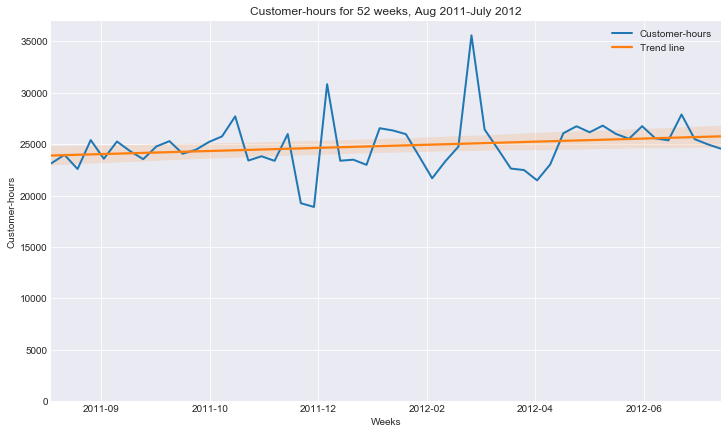

In [19]:
# plot weekly customer-hours, and overlay a regression line on it
ax=plt.figure(figsize=(12,7)).gca()

# plot the weekly customer-hours line graph:
df6.set_index('Timestamp')['HeadCount'].plot(label="Customer-hours",linewidth=2)

# plot the regression line:
sns.regplot(data=df6,x='Timestamp',y='HeadCount',ax=ax,scatter=False,label='Trend line')
ax.set_ylim(0,37000)

# adjust xaxis to show up as yyyy-mm vs timestamp
# https://stackoverflow.com/questions/40558128/using-datetimes-with-seaborns-regplot
xticks = ax.get_xticks()
xticks_dates = [datetime.datetime.fromtimestamp(x).strftime('%Y-%m') for x in xticks]
ax.set_xticklabels(xticks_dates)
ax.set_ylabel("Customer-hours")
ax.set_xlabel("Weeks")
ax.set_title("Customer-hours for 52 weeks, Aug 2011-July 2012")
ax.legend()
_=""

### 5.3 Finding: Increasing customer traffic
Over the observed period, Aug 2011 to July 2012, the casino enjoyed steadily increasing customer traffic. In Aug 2011 you had an average of 24,000 customer-hours per week. One year later traffic rose to an average of 26,000 customer-hours per week, an increase of 8.3%. 